MNIST ("Modified National Institute of Standards and Technology") is computer vision dataset released in 1999. It contains data of handwritten images and it is the "de facto" benchmark for classification algorithms. The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

# The data

The data description can be found at [Kaggle](https://www.kaggle.com/c/digit-recognizer/data):

> The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

> Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

> The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

> Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

# Exploration

In [13]:
library(tidyverse)
library(purrrlyr)
library(forcats) # factors munging
library(ggthemes) # visualization
library(party) # random forest
library(nnet) # neural nets
library(caret) # ML
library(VIM) # missing data

In [3]:
train <- read_csv("data/train.csv")
test <- read_csv("data/test.csv")

Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.


In [4]:
head(train)

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
train <- train %>%
                mutate(label = factor(label))

In [6]:
train <- train %>%
    mutate(intensity = 
           select(., starts_with("pixel")) %>%
               rowMeans()
          ) %>%
    select(intensity, everything())

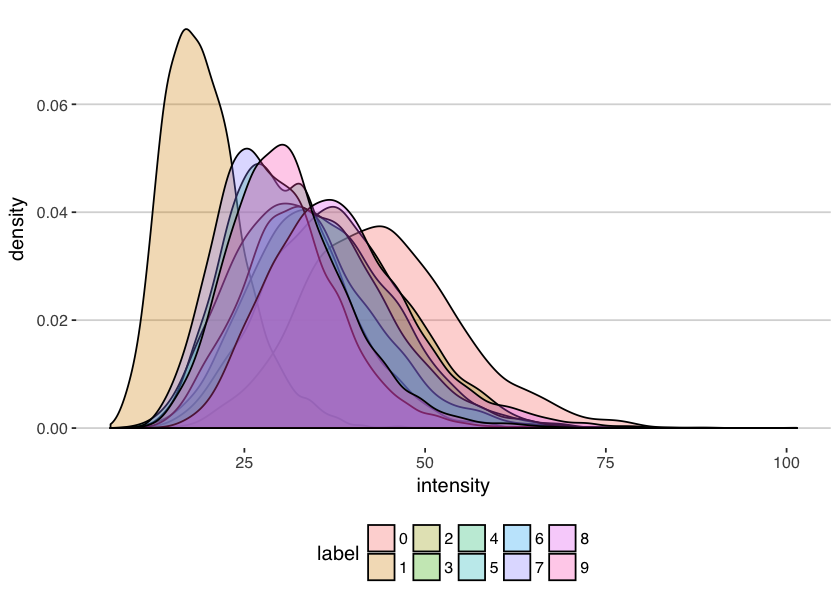

In [7]:
options(repr.plot.width=7, repr.plot.height=5)

ggplot(train, aes(x = intensity, y = ..density..)) +
    geom_density(aes(fill = label), alpha = 0.3) +
    theme_hc()

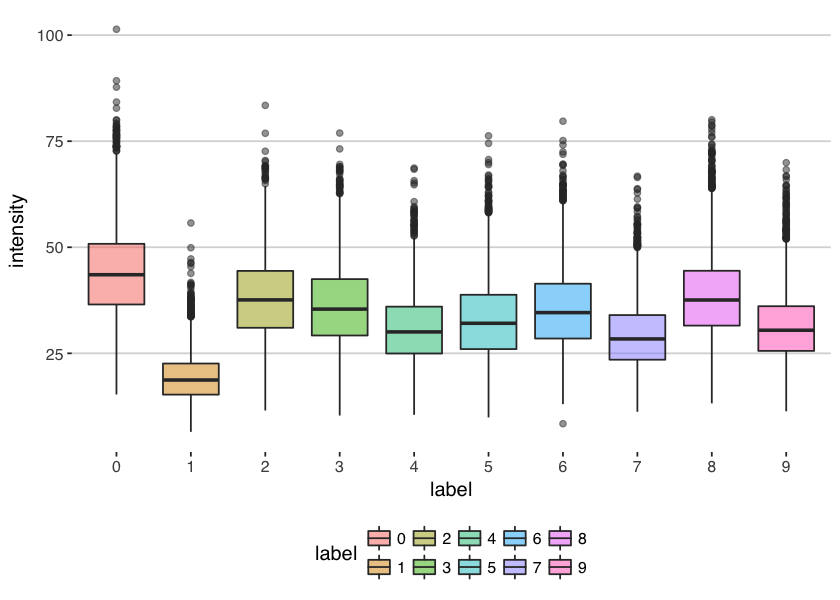

In [8]:
ggplot(train, aes(x = label, y = intensity)) +
    geom_boxplot(aes(fill = label), alpha = 0.5) +
    theme_hc()

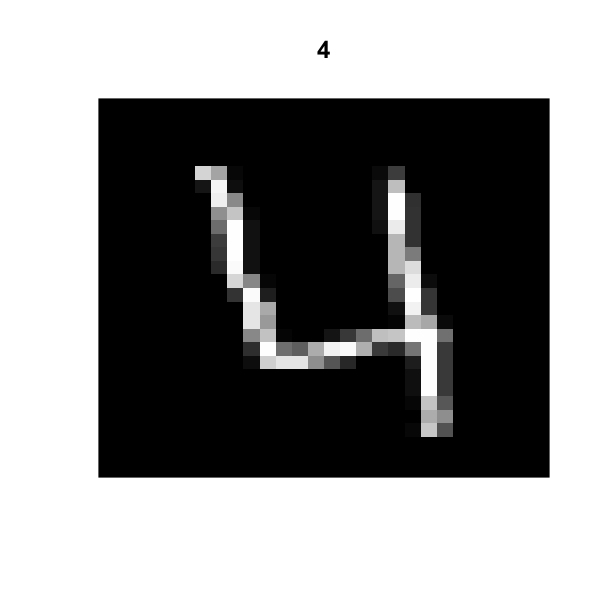

In [9]:
options(repr.plot.width=5, repr.plot.height=5)

flip <- function(matrix) {
      apply(matrix, 2, rev)
}

plot_digit <- function (obs) {
    m <- flip(matrix(rev(as.numeric(obs[-1])), 28, 28))
    image(m, axes = FALSE, col = grey(seq(0, 1, length = 256)))
    title(main = obs$label)
}

train[4, ] %>%
    select(-intensity) %>%
    plot_digit

In [10]:
digit_groups <- train %>%
    group_by(label)

## Mean

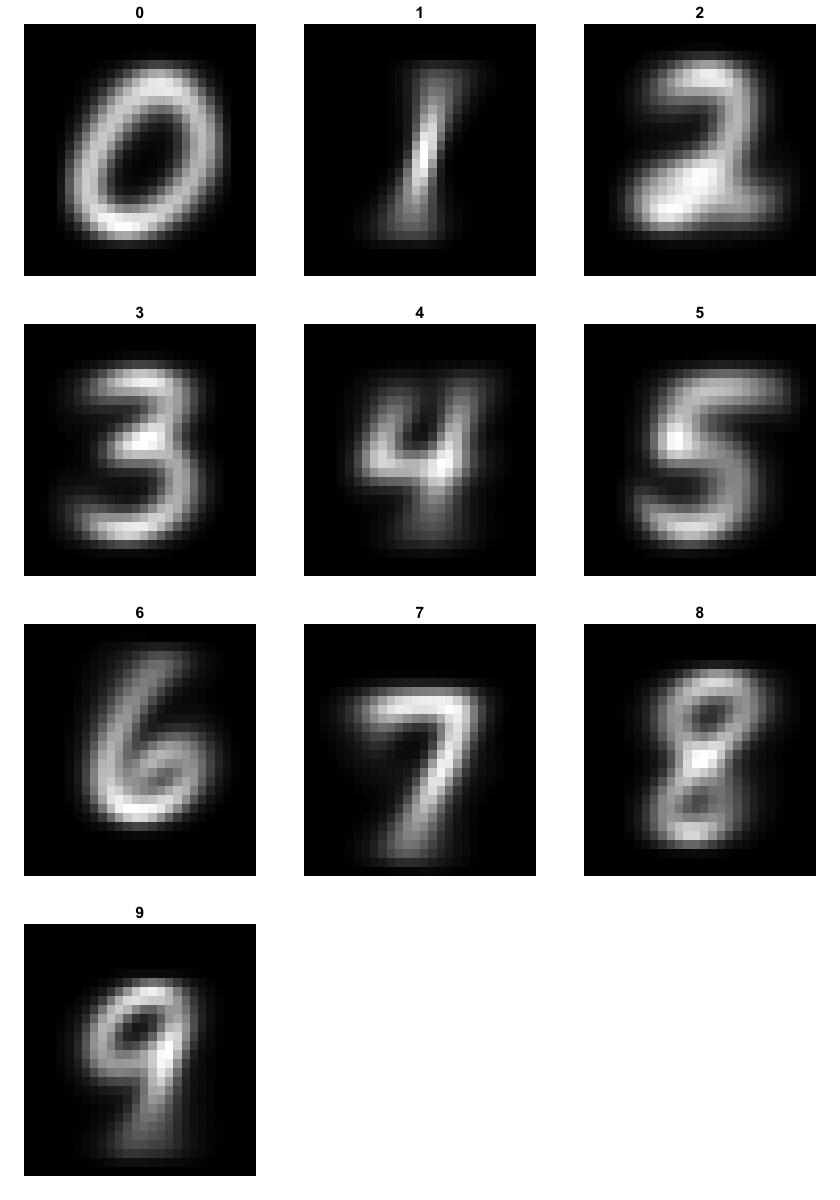

In [18]:
options(repr.plot.width=7, repr.plot.height=10)

par(mfrow=c(4,3), mar=c(1.5, 1.5, 1.5, 1.5))

r <- digit_groups %>%
    summarise_all(funs(mean)) %>%
    select(-intensity) %>%
    by_row(plot_digit)

## Median

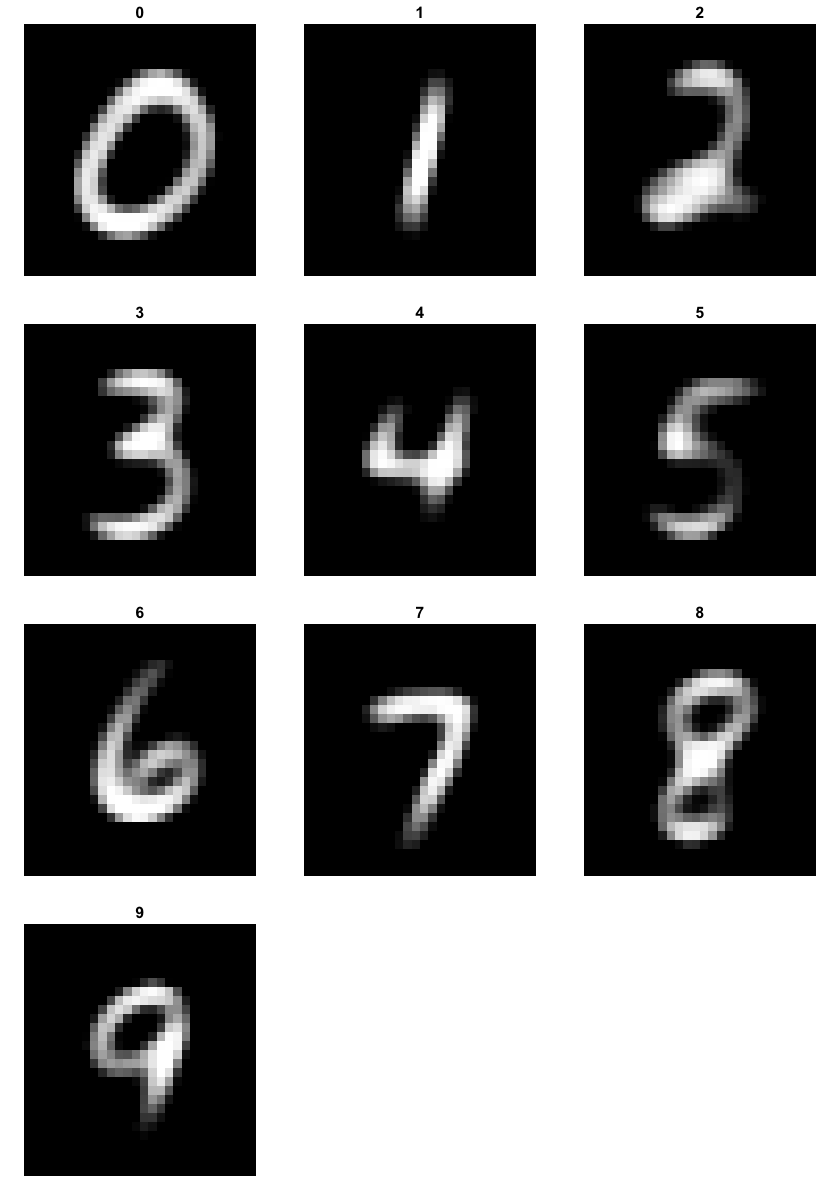

In [17]:
par(mfrow=c(4,3), mar=c(1.5, 1.5, 1.5, 1.5))

r <- digit_groups %>%
    summarise_all(funs(median)) %>%
    select(-intensity) %>%
    by_row(plot_digit)

## Standard deviation

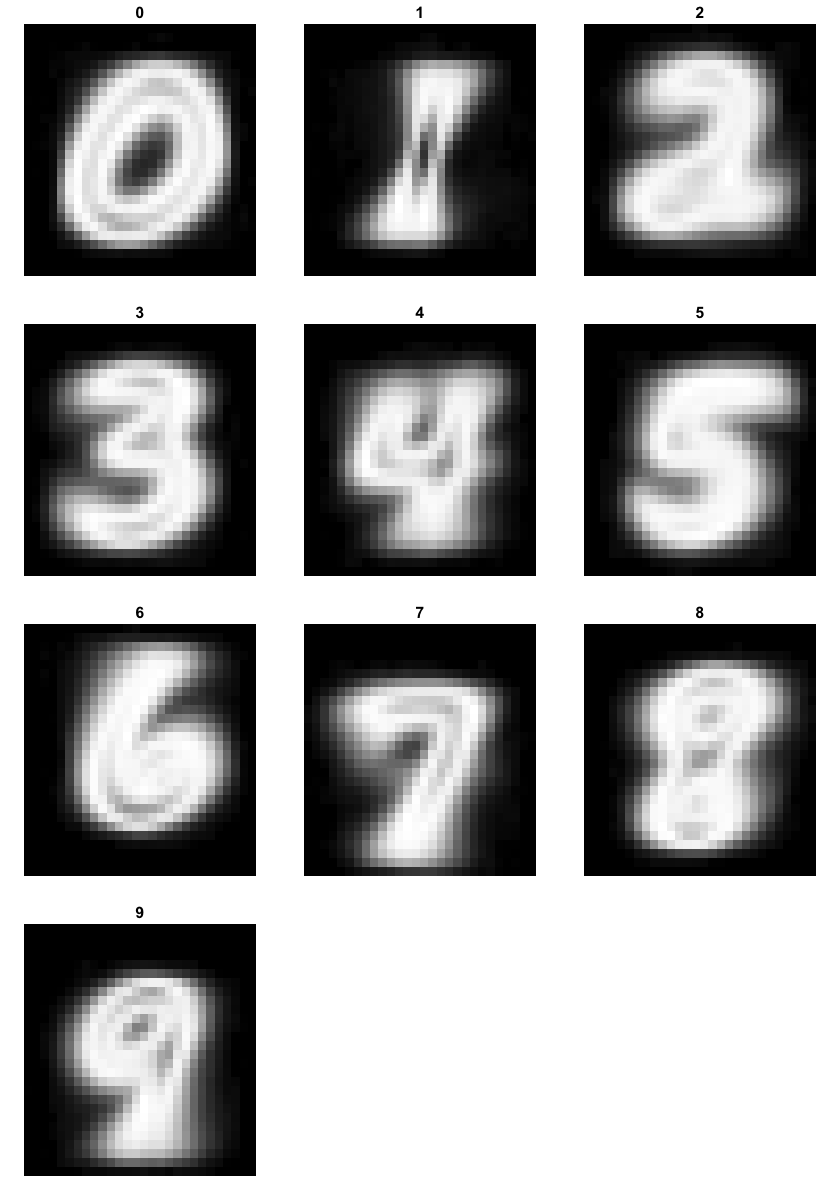

In [19]:
par(mfrow=c(4,3), mar=c(1.5, 1.5, 1.5, 1.5))

r <- digit_groups %>%
    summarise_all(funs(sd)) %>%
    select(-intensity) %>%
    by_row(plot_digit)